$$Conceito:$$

-Modelos Não Lineares 

-Modelos Supervisionados, que fazem inferência ou predição para outras observações não presentes na amostra

-Variáveis Quantitativas

-Distribuição Normal após transformação BOX-COX

$$Critérios:$$


$$Coeficientes:$$



# Objetivo: Usar as transformação de Box-Cox na variável target para que os residuos sejam aderentes à normalidade

In [28]:
#Pacotes
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Banco de dados 

In [2]:
#Carregar tabela
dados = pd.read_table("bebes.csv",sep=",",encoding="latin-1")
dados


,comprimento,idade
0,63.07,19.00
1,65.63,21.00
2,65.63,22.50
3,66.73,22.50
4,66.37,23.25
...,...,...
69,75.90,30.50
70,78.47,31.00
71,80.67,36.50
72,81.03,38.00


**Tabela com 72 observações e 2 variáveis**

# Dicionário de Dados das variáveis

**$$Variáveis:$$**

**-comprimento:** Comprimento do bebe em centímetros

**-idade:** Idade do bebe em semanas

    


In [3]:
#Info da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comprimento  74 non-null     float64
 1   idade        74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


**2 Variáveis Quantitativas**

In [4]:
#Descrição dos dados
dados.describe()

,comprimento,idade
count,74.000000,74.000000
mean,66.921622,25.312162
std,12.852386,12.975168
min,31.900000,2.150000
25%,56.470000,12.500000
50%,70.400000,26.000000
75%,75.807500,33.000000
max,87.630000,60.000000


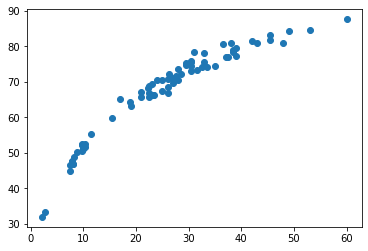

In [5]:
#Grafico de dispersão
plt.scatter(dados['idade'],dados['comprimento'])
plt.show()

**Comportamento não linear dos dados**

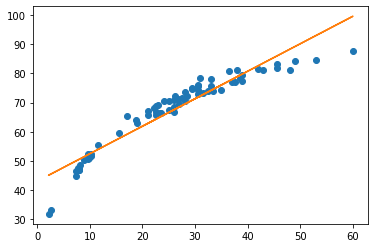

In [6]:
# #Grafico de dispersão com ajuste linear
plt.plot(dados['idade'],dados['comprimento'],'o')
m, b = np.polyfit(dados['idade'],dados['comprimento'], 1)
plt.plot(dados['idade'], m*dados['idade'] + b)



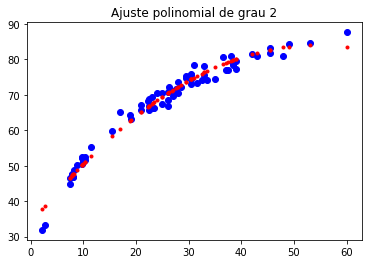

In [30]:
# #Grafico de dispersão com ajuste não linear
import warnings
warnings.filterwarnings('ignore')
x = dados['idade']
y = dados['comprimento']
deg = 2
z = np.polyfit(x, y, deg)
y2 = np.poly1d(z)
plt.plot(x, y, "o",color='b')
plt.plot(x, y2(x), "bo",color='r',markersize=3)
plt.title('Ajuste polinomial de grau 2')
plt.show()

**Note que o polinômio de grau 2 se ajustou melhor aos dados, portanto esses dados se mostram de forma não linear**

## Estimação do modelo OLS linear

In [8]:
#Modelo
import statsmodels.api as sm
x1 = sm.add_constant(dados['idade'])# Adicionar uma constante nas variaveis x
y = dados['comprimento'].values
modelo = sm.OLS(y,x1)
modelo_linear = modelo.fit()
modelo_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     667.7
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           3.72e-38
Time:                        16:58:55   Log-Likelihood:                -207.26
No. Observations:                  74   AIC:                             418.5
Df Residuals:                      72   BIC:                             423.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1004      1.034     41.665      0.000      41.038      45.163
idade          0.9411      0.036     25.841      0.000       0.868       1.014
==============================================================================
Omnibus:                       21.203   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.159
Skew:                          -1.218   Prob(JB):                     4.66e-07
Kurtosis:                       4.877   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#Teste t
modelo_linear.pvalues

const    3.850850e-52
idade    3.720648e-38
dtype: float64

**Valor do P-valor do teste t é estatisticamente significante, portanto há modelo**

In [10]:
#R²
modelo_linear.rsquared

0.9026677262332912

**A variável X explica 90% do comportamento da variável Y**

### Obs: Na regressão linear, não podemos apenas olhar para o teste t e o R², caso a distribuição dos resíduos não seja aderente à normalidade, a maior parte dos dados vai estar fora do nível de confiança da linha de regressão

## Teste de Shapiro-Francia = Teste de verificação da aderência dos resíduos à normalidade

Shapiro-Wilk: número de amostras <= 30

Shapiro-Francia: número de amostras > 30


In [11]:
#Teste de Shapiro Francia
import scipy.stats as stats
shapiro_stats, shapiro_p_valor = stats.shapiro(modelo_linear.resid)
print(f'Valor do teste de Shapiro Francia= {shapiro_p_valor:.6f}, é menor que 0.05 , Portanto não ha Distribuiçao Normal')

Valor do teste de Shapiro Francia= 0.000060, é menor que 0.05 , Portanto não ha Distribuiçao Normal


**O que se espera do teste de Shapiro é que o valor do teste seja maior que 0.05, sendo assim, os resíduos aderem a uma distribuição normal, onde a maioria dos dados fica dentro do intervalo de confiança da reta de regressão**

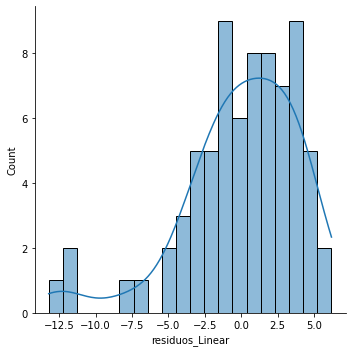

In [12]:
#Histograma da Aderência dos residuos

#transformar os redisuos em uma coluna
dados['residuos_Linear']=modelo_linear.resid

#Construir o histograma
sns.displot(dados['residuos_Linear'],kde=True,bins=20);
plt.show()

**Para que aja aderência entre a distribuição normal e a distribuição real dos resíduos a um nível de significância de 5%, 95% dos dados tem que estar dentro da curva da distribuição normal**

**Como os resíduos não são aderentes a uma distribuição normal, temos que fazer a transformação de BOX-COX**

## Transformação de Box-Cox - Distribuição Nao Linear

-Temos que transformar a variável Y, para que a distribuição dos residuos seja aderente a uma distribuição normal



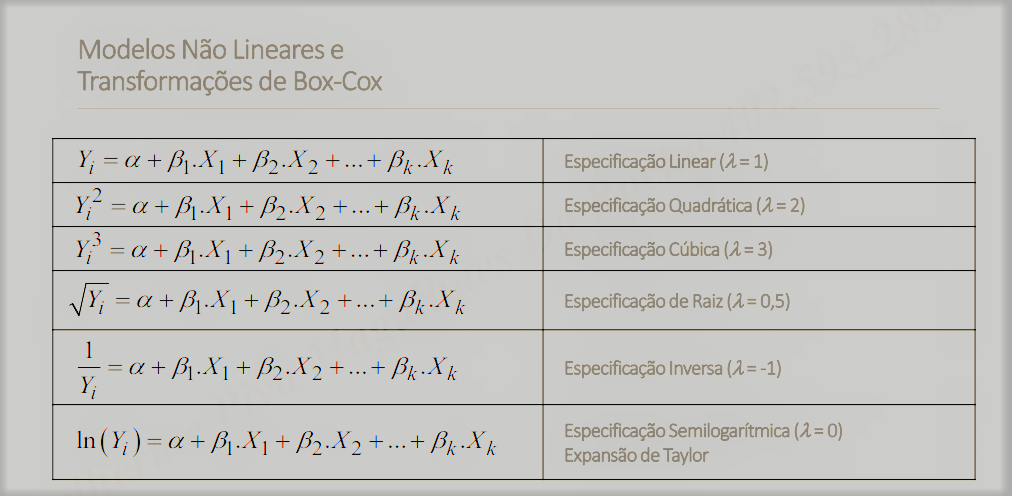

In [13]:
from IPython.display import Image
Image(filename="BoxCox.png")

## Qual o valor de Lambda (Λ) ((Λ) varia entre –∞ e +∞) que maximiza a aderência da distribuição da nova variável Y à normalidade?

In [14]:
#Calculo do Lambda
from scipy.stats import boxcox
from scipy.special import inv_boxcox

dados_transform, lambda_boxcox = boxcox(dados['comprimento'])
lambda_boxcox

2.659051008426254

**O lambda que maximiza a aderência da Nova variável Y há normalidade é 2.6590..., Especificação Quadrática**

In [15]:
#Inserindo o lambda de Box-Cox na base de dados para a estimação de um novo modelo
dados['y_boxcox'] = (((dados['comprimento']**lambda_boxcox) -1) / lambda_boxcox)
dados.head(5)

,comprimento,idade,residuos_Linear,y_boxcox
0,63.07,19.00,2.088740,22966.083193
1,65.63,21.00,2.766545,25529.065309
2,65.63,22.50,1.354898,25529.065309
3,66.73,22.50,2.454898,26682.722356
4,66.37,23.25,1.389075,26301.657668


In [16]:
#Estimando um novo modelo OLS com variável dependente transformada por Box-Cox
import statsmodels.api as sm
x1 = sm.add_constant(dados['idade'])# Adicionar uma constante nas variaveis x
y = dados['y_boxcox'].values
modelo2 = sm.OLS(y,x1)
modelo_boxcox = modelo2.fit()
modelo_boxcox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1822.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           7.16e-53
Time:                        16:58:55   Log-Likelihood:                -681.77
No. Observations:                  74   AIC:                             1368.
Df Residuals:                      72   BIC:                             1372.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4995.1602    630.253      7.926      0.000    3738.774    6251.546
idade        947.2298     22.189     42.689      0.000     902.997     991.463
==============================================================================
Omnibus:                        1.140   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                0.557
Skew:                           0.098   Prob(JB):                        0.757
Kurtosis:                       3.377   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Teste t
modelo_boxcox.pvalues

const    2.110595e-11
idade    7.162951e-53
dtype: float64

**Valor do P-valor do teste t é estatisticamente significante**

## R² Ajustado - Comparação entre modelos

-Quando houver o intuito de se compararem os resultados das estimações de dois modelos com quantidades distintas de parâmetros e/ou obtidos a partir de amostras com tamanhos diferentes, faz-se necessário o uso do R² ajustado

In [18]:
#R² ajustado do modelo de regressão linear
modelo_linear.rsquared_adj

0.9013158890976425

In [19]:
#R² ajustado do modelo de Box-Cox
modelo_boxcox.rsquared_adj

0.9614649910990887

**Note que o R² ajustado do modelo de Box-Cox é bem maior que o modelo linear**

In [33]:
#Teste de Shapiro Francia
import scipy.stats as stats
shapiro_stats, shapiro_p_valor = stats.shapiro(modelo_boxcox.resid)
print(f'Valor do teste de Shapiro Francia= {shapiro_p_valor:.6f}, é maior que 0.05 , Portanto há aderencia dos residuos há uma distribuição normal')

Valor do teste de Shapiro Francia= 0.181918, é maior que 0.05 , Portanto há aderencia dos residuos há uma distribuição normal


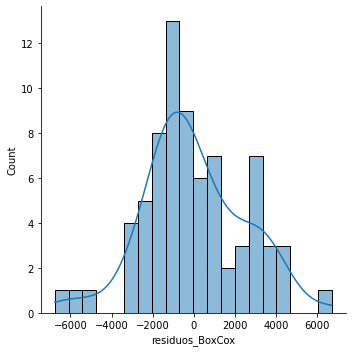

In [21]:
 #Histograma da Aderência dos residuos

#transformar os redisuos em uma coluna
dados['residuos_BoxCox']=modelo_boxcox.resid

#Construir o histograma
sns.displot(dados['residuos_BoxCox'],kde=True,bins=20);
plt.show()

**As diferenças entre a distribuição normal e a distribuição real dos resíduos não se mostraram estatisticamente significantes a um nível de significância de 5%**

### Predições com os modelos OLS linear e Box-Cox

In [22]:
#Predições com os modelos OLS linear 
dados['Pred_linear'] = modelo_linear.predict(x1)
dados['Pred_linear']

0     60.981260
1     62.863455
2     64.275102
3     64.275102
4     64.980925
        ...    
69    71.803884
70    72.274433
71    77.450471
72    78.862117
73    79.332666
Name: Pred_linear, Length: 74, dtype: float64

In [23]:
#Predições com os modelos OLS Box-Cox
pred_boxcox = modelo_boxcox.predict(x1)

#Não podemos nos esquecer de fazer o cálculo inverso da Box-Cox para a obtenção do fitted
dados['Pred_boxcox'] = (((pred_boxcox * lambda_boxcox) + 1)) ** (1 / lambda_boxcox)
dados['Pred_boxcox']

0     63.097300
1     65.004303
2     66.375858
3     66.375858
4     67.044337
        ...    
69    73.004869
70    73.386942
71    77.388462
72    78.422026
73    78.761571
Name: Pred_boxcox, Length: 74, dtype: float64

In [27]:
#Base de dados completa
dados

,comprimento,idade,residuos_Linear,y_boxcox,residuos_BoxCox,Pred_linear,Pred_boxcox
0,63.07,19.00,2.088740,22966.083193,-26.443175,60.981260,63.097300
1,65.63,21.00,2.766545,25529.065309,642.079341,62.863455,65.004303
2,65.63,22.50,1.354898,25529.065309,-778.765359,64.275102,66.375858
3,66.73,22.50,2.454898,26682.722356,374.891688,64.275102,66.375858
4,66.37,23.25,1.389075,26301.657668,-716.595351,64.980925,67.044337
...,...,...,...,...,...,...,...
69,75.90,30.50,4.096116,37577.490653,3691.821582,71.803884,73.004869
70,78.47,31.00,6.195567,41056.602846,6697.318875,72.274433,73.386942
71,80.67,36.50,3.219529,44189.008109,4619.960237,77.450471,77.388462
72,81.03,38.00,2.167883,44715.317793,3725.425221,78.862117,78.422026


# Comparaçao dos modelos (LINEAR e NAO LINEAR)

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#Modelo de regressão linear
print(mean_squared_error(dados['comprimento'],dados['Pred_linear']))
print(mean_absolute_error(dados['comprimento'],dados['Pred_linear']))

15.860451853514565
3.0233244903307326


In [26]:
#Modelo não linear
print(mean_squared_error(dados['comprimento'],dados['Pred_boxcox']))
print(mean_absolute_error(dados['comprimento'],dados['Pred_boxcox']))

6.044296776882885
1.8710438870110118


**Verificando as metricas mean_absolute_error e mean_squared_error, confirmamos que o modelo não linear (Box-Cox) apresenta um resultado melhor do que o modelo linear** 